Compare the exact gradient of the log-likelihood with our approximation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from lazy_GP import GP
%matplotlib inline
gp = GP()

Generate some data

In [15]:
np.random.seed(42)
N = 100
D = 1
X = np.vstack(np.linspace(0, 10, N))
sigma = 0.1
y = np.sin(X) + sigma * np.random.randn(N, 1)

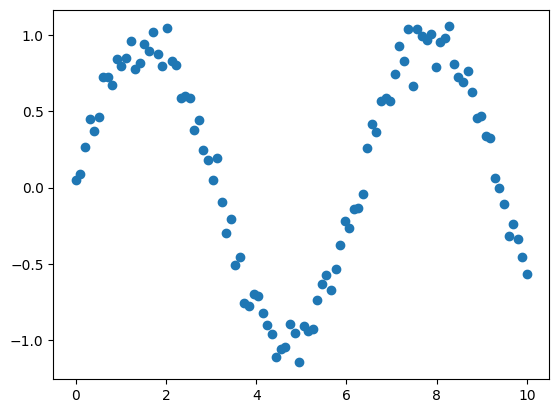

In [16]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
plt.show()

In [17]:
gp = GP()
theta_array = np.linspace(0.2, 2, 20)
grad = []
grad_exact = []
for theta in theta_array:
    grad.append(gp.dlogp(X=X, y=y, theta=np.array([theta]), sigma=sigma))
    grad_exact.append(gp._exact_dlogp(X=X, y=y, theta=np.array([theta]), sigma=sigma))

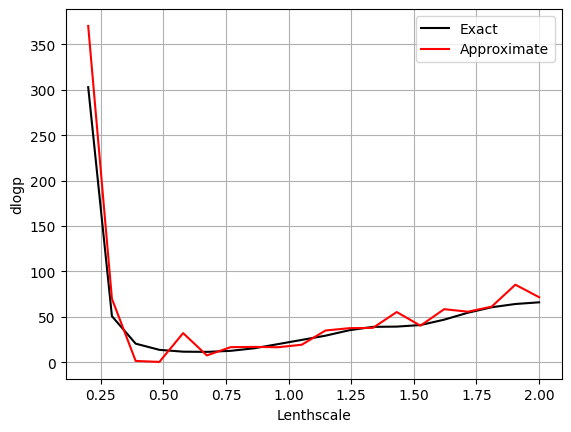

In [18]:
fig, ax = plt.subplots()
ax.plot(theta_array, grad_exact, color='black', label='Exact')
ax.plot(theta_array, grad, color='red', label='Approximate')
ax.grid()
ax.legend()
ax.set_xlabel('Lenthscale')
ax.set_ylabel('dlogp')
plt.show()